# Project 1 Final

In [67]:
import plotly.express as px
import panel as pn
import pandas as pd
import quandl
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import numpy as np

import hvplot.pandas
import plotly.express as px

%matplotlib inline

In [68]:
inflation_projection = quandl.get("FRED/PCECTPIMD")
inflation_projection.head()

,Value
Date,
2021-01-01,3.4
2022-01-01,2.1
2023-01-01,2.2


In [69]:
inflation_projection_plot = inflation_projection.hvplot.line()
inflation_projection_plot

:Curve   [Date]   (Value)

In [70]:
inflation_hist_df = quandl.get("RATEINF/CPI_USA")
inflation_hist_df

,Value
Date,
1913-01-31,9.800
1913-02-28,9.800
1913-03-31,9.800
1913-04-30,9.800
1913-05-31,9.700
...,...
2021-02-28,263.014
2021-03-31,264.877
2021-04-30,267.054


In [71]:
#dxy_var_hist_df = dxy_hist_df['Close'].var()
#dxy_var_hist_df
inflation_hist__df = inflation_hist_df[['Value']]
inflation_hist_pct_df = inflation_hist__df.pct_change()
inflation_hist_pct_df.dropna(inplace=True)
inflation_hist_pct_df

,Value
Date,
1913-02-28,0.000000
1913-03-31,0.000000
1913-04-30,0.000000
1913-05-31,-0.010204
1913-06-30,0.010309
...,...
2021-02-28,0.005474
2021-03-31,0.007083
2021-04-30,0.008219


In [72]:
# Rename the column
inflation_hist_pct_df.rename(columns = {"Value": "Inflation Rate"}, inplace = True)
inflation_hist_pct_df

,Inflation Rate
Date,
1913-02-28,0.000000
1913-03-31,0.000000
1913-04-30,0.000000
1913-05-31,-0.010204
1913-06-30,0.010309
...,...
2021-02-28,0.005474
2021-03-31,0.007083
2021-04-30,0.008219


In [73]:
cumulative_returns = (1 + inflation_hist_pct_df).cumprod() - 1
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (Inflation Rate)

In [74]:
# import DXY history data to Pandas
dxy_hist_path = Path("./Resources/dxy-price-history.csv")
dxy_hist_df = pd.read_csv(dxy_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
dxy_hist_df.index = pd.to_datetime(dxy_hist_df.index)
dxy_hist_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-08-24,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-25,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-26,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-27,117.839996,117.839996,117.839996,117.839996,117.839996,0.0
1971-08-29,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# import tether history data to Pandas
tether_hist_path = Path("./Resources/tether-price-history.csv")
tether_hist_df = pd.read_csv(tether_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
tether_hist_df.index = pd.to_datetime(tether_hist_df.index)
tether_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-29,1.00253,1.01681,0.995690,1.00152,1.178964e+08,3.201709e+08
2017-08-30,1.00170,1.00721,0.996119,1.00074,1.367042e+08,3.199817e+08
2017-08-31,1.00006,1.00823,0.999514,1.00312,1.022734e+08,3.202965e+08
2017-09-01,1.00405,1.01373,1.000540,1.00437,1.434681e+08,3.211231e+08
2017-09-02,1.00459,1.04082,0.998739,1.01788,2.954876e+08,3.330269e+08


In [76]:
#import bitcoin history data to Pandas
btc_hist_path = Path("./Resources/bitcoin-price-history.csv")

btc_hist_df = pd.read_csv(btc_hist_path, index_col="Date",infer_datetime_format=True, parse_dates=True)
#btc_hist_df["Date"]=btc_hist_df["Date"].astype("datetime")
#btc_hist_df.dtypes
btc_hist_df.index = pd.to_datetime(btc_hist_df.index)
#btc_hist_df.set_index(pd.to_datetime(btc_hist_df.index))

btc_hist_df.sort_index(inplace=True)
btc_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-07-17,96.7100,99.9700,96.1800,98.5000,0.0,1.120160e+09
2013-07-18,98.5000,98.8000,86.2000,90.5800,0.0,1.050191e+09
2013-07-19,90.0689,95.2001,87.8000,92.1700,0.0,1.035626e+09
2013-07-20,92.0000,93.1000,89.2711,89.3901,0.0,1.051175e+09
2013-07-21,89.8214,91.9500,88.0000,90.7573,0.0,1.025637e+09


In [77]:
# import eth history data to Pandas
eth_hist_path = Path("./Resources/ethereum-price-history.csv")
eth_hist_df = pd.read_csv(eth_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_hist_df.index = pd.to_datetime(eth_hist_df.index)

eth_hist_df.sort_index(inplace=True)
eth_hist_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-07-25,12.7495,13.8570,12.6838,13.8105,6.168861e+07,1.095915e+09
2016-07-26,13.8361,13.8511,11.7272,11.7632,5.788441e+07,1.056037e+09
2016-07-27,11.9895,13.3119,11.8357,12.9646,8.589149e+07,1.046191e+09
2016-07-28,12.9728,12.9882,12.4927,12.8619,3.914490e+07,1.050281e+09
2016-07-29,12.8436,12.8706,12.5542,12.8162,1.877377e+07,1.046257e+09


In [78]:
# import gld history data to Pandas
gld_hist_path = Path("./Resources/LBMA-GOLD.csv")
gld_hist_df = pd.read_csv(gld_hist_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
gld_hist_df.index = pd.to_datetime(gld_hist_df.index)

gld_hist_df.sort_index(inplace=True)
gld_hist_df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN


In [79]:
#dxy_var_hist_df = dxy_hist_df['Close'].var()
#dxy_var_hist_df
dxy_hist_close_df = dxy_hist_df[['Close']]
dxy_hist_pct_df = dxy_hist_close_df.pct_change()
dxy_hist_pct_df.dropna(inplace=True)

dxy_hist_pct_df

,Close
Date,
1971-08-25,0.000000
1971-08-26,0.000000
1971-08-27,0.000000
1971-08-29,0.000000
1971-08-30,0.000000
...,...
2021-07-19,0.002158
2021-07-20,0.000861
2021-07-21,-0.002366


In [80]:
# Rename the column
dxy_hist_pct_df.rename(columns = {"Close": "DXY"}, inplace = True)
dxy_hist_pct_df

,DXY
Date,
1971-08-25,0.000000
1971-08-26,0.000000
1971-08-27,0.000000
1971-08-29,0.000000
1971-08-30,0.000000
...,...
2021-07-19,0.002158
2021-07-20,0.000861
2021-07-21,-0.002366


In [81]:
cumulative_returns = (1 + dxy_hist_pct_df).cumprod()
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (DXY)

In [82]:
#tether_var_hist_df = tether_hist_df['Close'].var()
#tether_var_hist_df
tether_hist_close_df = tether_hist_df[['Close']]
tether_hist_pct_df = tether_hist_close_df.pct_change()
tether_hist_pct_df.dropna(inplace=True)
tether_hist_pct_df

,Close
Date,
2017-08-30,-0.000779
2017-08-31,0.002378
2017-09-01,0.001246
2017-09-02,0.013451
2017-09-03,-0.015375
...,...
2021-07-24,-0.000300
2021-07-25,0.000000
2021-07-26,0.000000


In [83]:
# Rename the column
tether_hist_pct_df.rename(columns = {"Close": "Tether"}, inplace = True)
tether_hist_pct_df

,Tether
Date,
2017-08-30,-0.000779
2017-08-31,0.002378
2017-09-01,0.001246
2017-09-02,0.013451
2017-09-03,-0.015375
...,...
2021-07-24,-0.000300
2021-07-25,0.000000
2021-07-26,0.000000


In [84]:
cumulative_returns = (1 + tether_hist_pct_df).cumprod()
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (Tether)

In [87]:
#btc_var_hist_df = btc_hist_df['Close'].var()
#btc_var_hist_df
btc_hist_close_df = btc_hist_df[['Close']]
btc_hist_pct_df = btc_hist_close_df.pct_change()
btc_hist_pct_df.dropna(inplace=True)

In [88]:
# Rename the column
btc_hist_pct_df.rename(columns = {"Close": "BTC"}, inplace = True)
btc_hist_pct_df

,BTC
Date,
2013-07-18,-0.080406
2013-07-19,0.017554
2013-07-20,-0.030161
2013-07-21,0.015295
2013-07-22,0.009395
...,...
2021-07-19,-0.030209
2021-07-20,-0.035395
2021-07-21,0.080074


In [89]:
cumulative_returns = (1 + btc_hist_pct_df).cumprod()
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (BTC)

In [90]:
#eth_var_hist_df = eth_hist_df['Close'].var()
#eth_var_hist_df
eth_hist_close_df = eth_hist_df[['Close']]
eth_hist_pct_df = eth_hist_close_df.pct_change()
eth_hist_pct_df.dropna(inplace=True)

In [91]:
# Rename the column
eth_hist_pct_df.rename(columns = {"Close": "ETH"}, inplace = True)
eth_hist_pct_df

,ETH
Date,
2016-07-26,-0.148242
2016-07-27,0.102132
2016-07-28,-0.007922
2016-07-29,-0.003553
2016-07-30,-0.026506
...,...
2021-07-19,-0.040577
2021-07-20,-0.020670
2021-07-21,0.116298


In [92]:
cumulative_returns = (1 + eth_hist_pct_df).cumprod()
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (ETH)

In [93]:
#gld_var_hist_df = gld_hist_df['Close'].var()
#gld_var_hist_df
gld_hist_df = gld_hist_df[['USD (PM)']]
gld_hist_pct_df = gld_hist_df.pct_change()
gld_hist_pct_df.dropna(inplace=True)
gld_hist_pct_df

,USD (PM)
Date,
1968-04-02,-0.010610
1968-04-03,0.008043
1968-04-04,-0.017287
1968-04-05,0.001353
1968-04-08,0.001351
...,...
2021-06-24,-0.003768
2021-06-25,0.001008
2021-06-28,-0.003554


In [94]:
# Rename the column
gld_hist_pct_df.rename(columns = {"USD (PM)": "Gold"}, inplace = True)
gld_hist_pct_df

,Gold
Date,
1968-04-02,-0.010610
1968-04-03,0.008043
1968-04-04,-0.017287
1968-04-05,0.001353
1968-04-08,0.001351
...,...
2021-06-24,-0.003768
2021-06-25,0.001008
2021-06-28,-0.003554


In [95]:
cumulative_returns = (1 + gld_hist_pct_df).cumprod()
cumulative_returns_plot = cumulative_returns.hvplot.line()
cumulative_returns_plot

:Curve   [Date]   (Gold)

In [116]:
# Concatenate all dataframes into one dataframe
df_daily = pd.concat([btc_hist_pct_df, eth_hist_pct_df, dxy_hist_pct_df, gld_hist_pct_df, tether_hist_pct_df], axis = "columns", join = "inner")

df_daily.sort_index(inplace=True)
df_daily.head()


,BTC,ETH,DXY,Gold,Tether
Date,,,,,
2017-08-30,-0.001676,0.019166,0.005739,-0.007697,-0.000779
2017-08-31,0.029838,0.012526,-0.002261,0.002484,0.002378
2017-09-01,0.037148,0.011736,0.001511,0.006594,0.001246
2017-09-05,0.037953,0.060779,-0.005387,0.001838,-0.025540
2017-09-06,0.047633,0.066569,-0.000217,0.001722,0.000856


<AxesSubplot:xlabel='Date'>

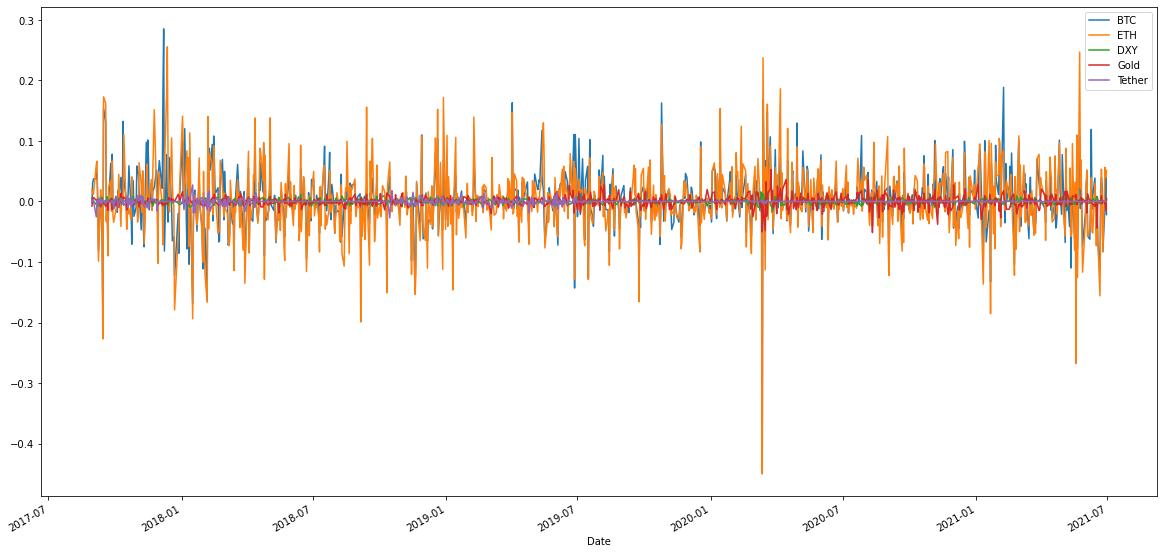

In [117]:
# Plot daily returns
df_daily.plot(figsize = (20,10))

<AxesSubplot:>

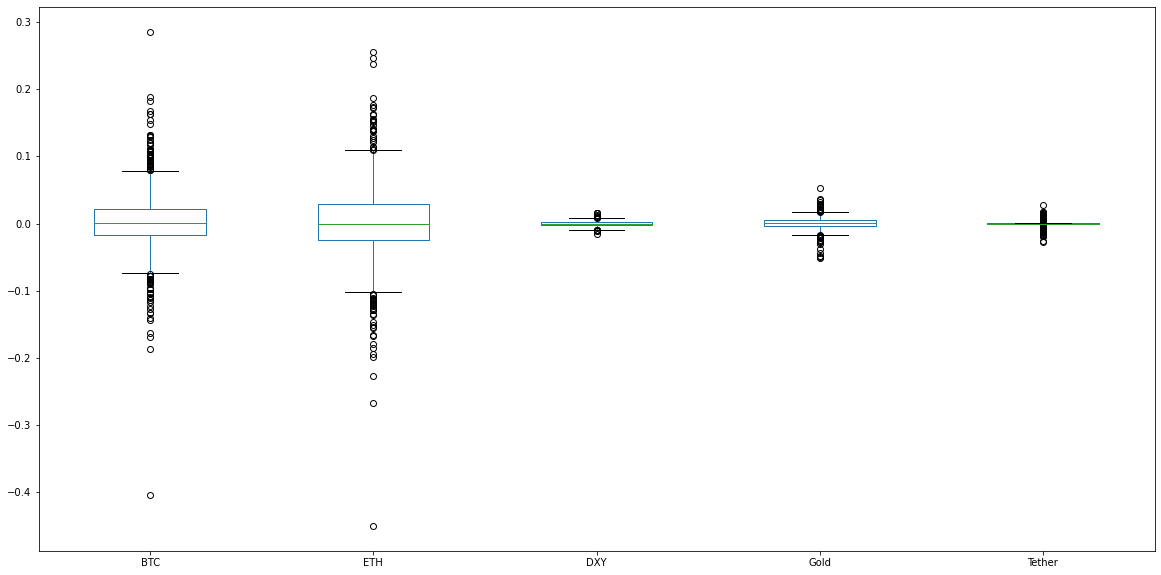

In [118]:
# Box plot to visually illustrate risk
df_daily.plot(kind = "box", figsize = (20, 10))

In [136]:
# Plot cumulative returns
df_cum = (1 + df_daily).cumprod()
df_cum.hvplot(figsize = (20, 10))

    

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [120]:
# Calculate std for each asset
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
BTC,0.046650
ETH,0.056512
DXY,0.003698
Gold,0.008931
Tether,0.003697


In [121]:
df_daily_std.hvplot()

:Curve   [index]   (std)

In [122]:
# Determine which portfolio is more risky than dxy
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["DXY", "std"]]
higher_std

,std
BTC,0.046650
ETH,0.056512
Gold,0.008931


In [123]:
# Calculate annualized std
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
BTC,0.740550
ETH,0.897096
DXY,0.058702
Gold,0.141769
Tether,0.058681


<AxesSubplot:xlabel='Date'>

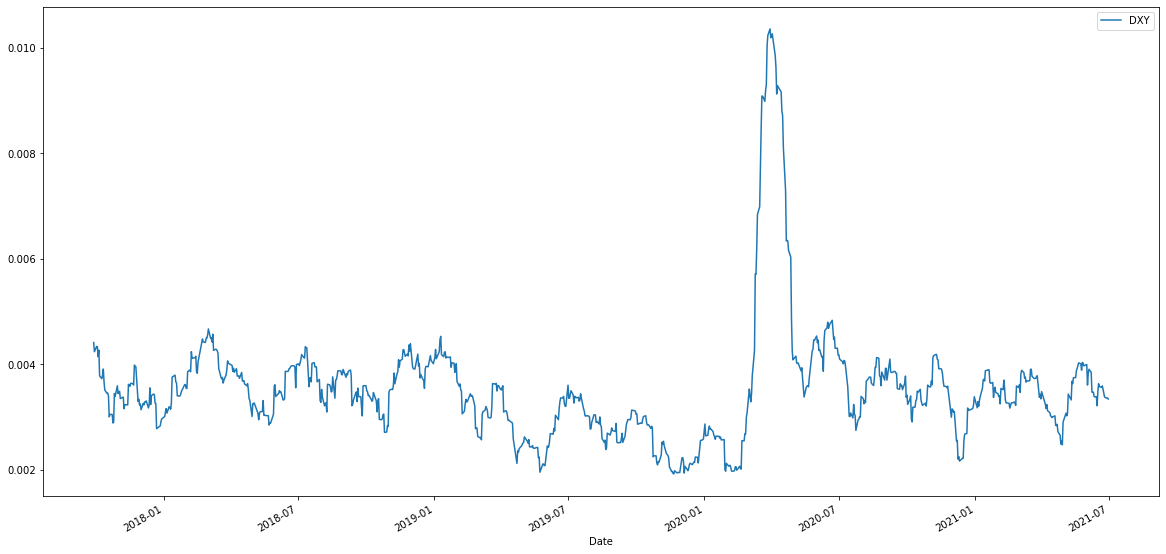

In [124]:
# Calculate and plot rolling std for dxy for 21 day period
dxy_rolling_21 = df_daily[["DXY"]].rolling(window=21).std()
dxy_rolling_21.plot(figsize = (20, 10))

In [125]:
correlation_dxy = pd.DataFrame(df_daily.corr()).loc[:, "DXY"]
correlation_dxy [correlation_dxy==correlation_dxy[correlation_dxy<1].max()]

Tether   -0.030141
Name: DXY, dtype: float64

<AxesSubplot:xlabel='DXY', ylabel='BTC'>

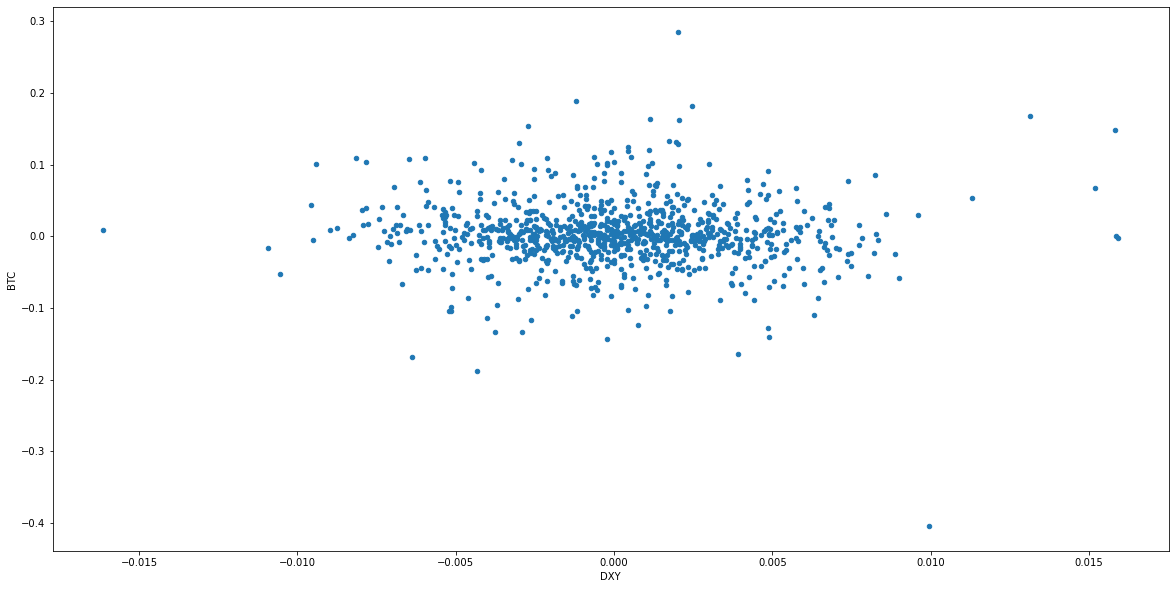

In [126]:
df_daily.plot(kind="scatter", y = "BTC", x = "DXY", figsize = (20, 10))

<AxesSubplot:xlabel='DXY', ylabel='ETH'>

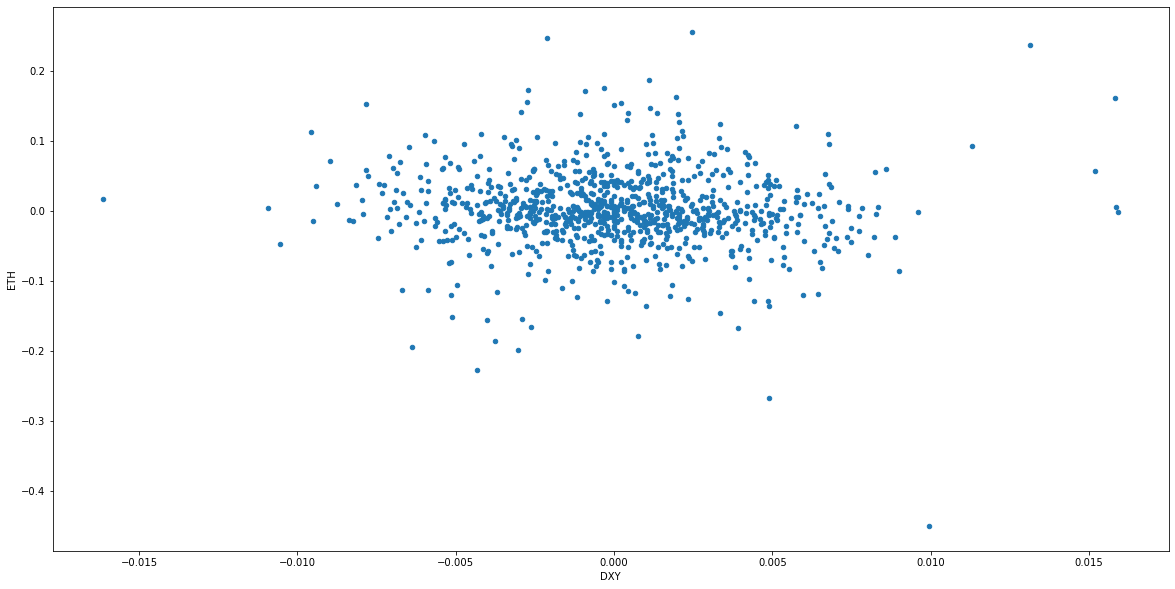

In [127]:
df_daily.plot(kind="scatter", y = "ETH", x = "DXY", figsize = (20, 10))

<AxesSubplot:xlabel='DXY', ylabel='Gold'>

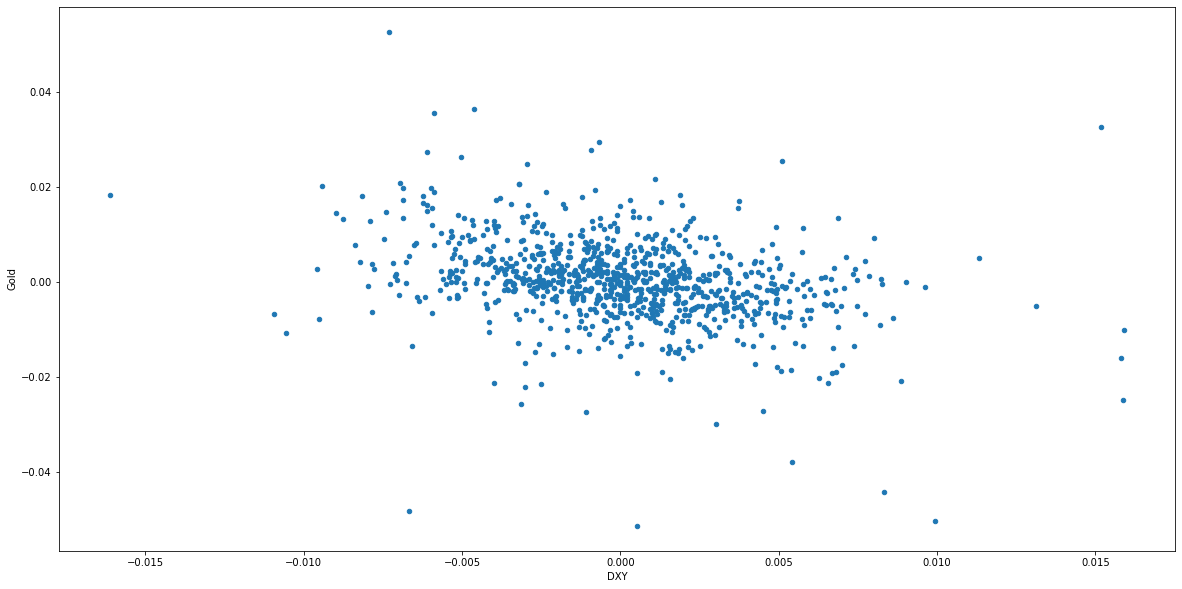

In [128]:
df_daily.plot(kind="scatter", y = "Gold", x = "DXY", figsize = (20, 10))

<AxesSubplot:title={'center':'Rolling 60 day beta of Bitcoin comapred to DXY'}, xlabel='Date'>

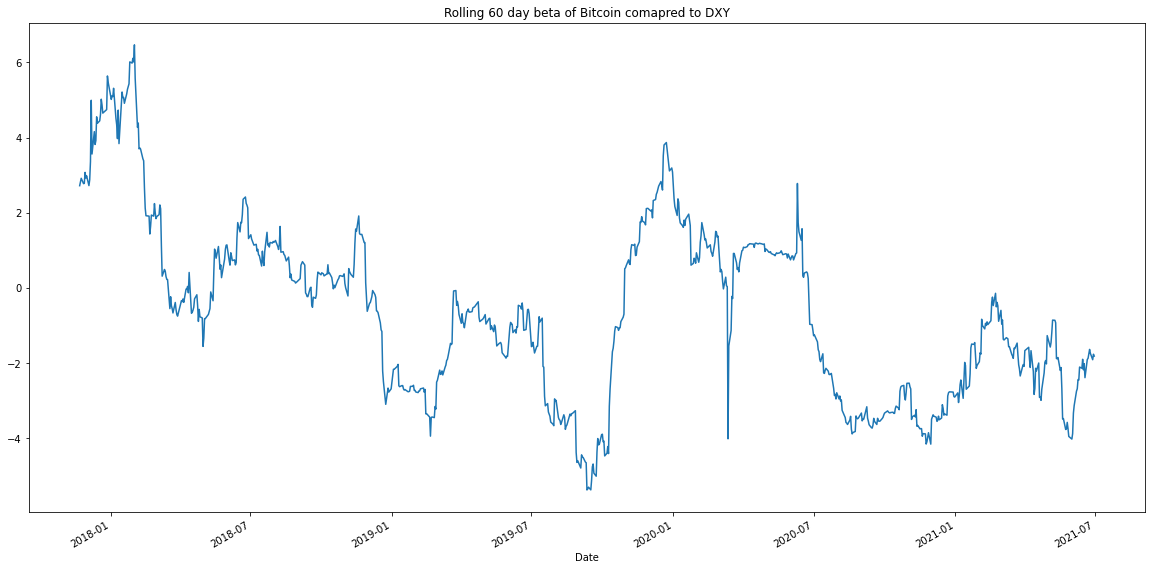

In [129]:
# Calculate Beta for bitcoin compared to dxy
rolling_covariance = df_daily['BTC'].rolling(window=60).cov(df_daily['DXY'])
rolling_variance = df_daily['DXY'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of Bitcoin comapred to DXY')

<AxesSubplot:title={'center':'Rolling 60 day beta of Tether comapred to DXY'}, xlabel='Date'>

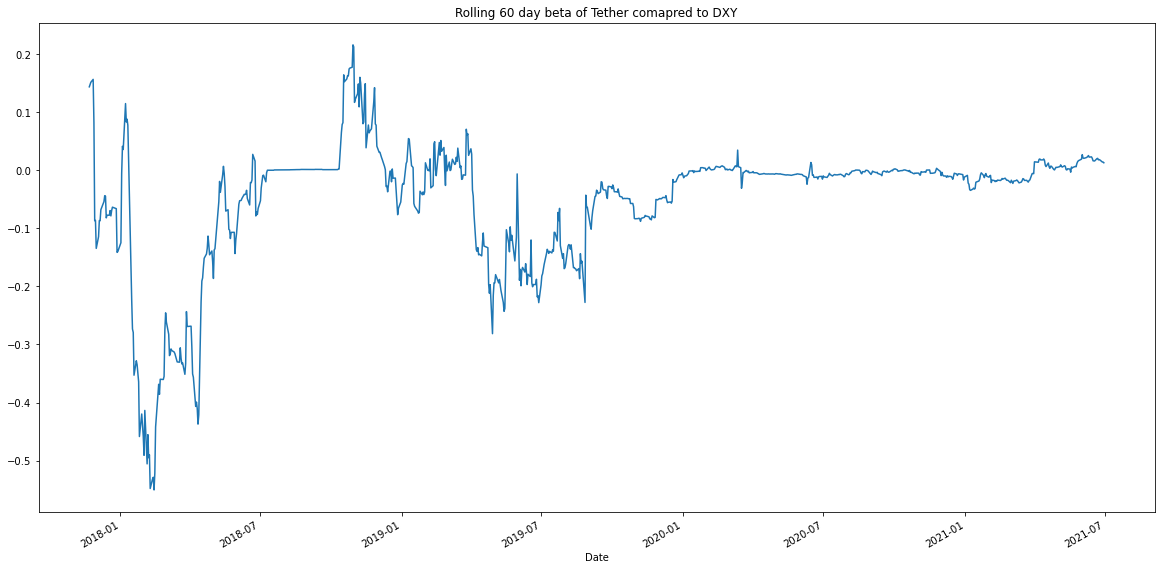

In [130]:
# Calculate Beta for tether compared to dxy
rolling_covariance = df_daily['Tether'].rolling(window=60).cov(df_daily['DXY'])
rolling_variance = df_daily['DXY'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of Tether comapred to DXY')

<AxesSubplot:title={'center':'Rolling 60 day beta of ETH compared to DXY'}, xlabel='Date'>

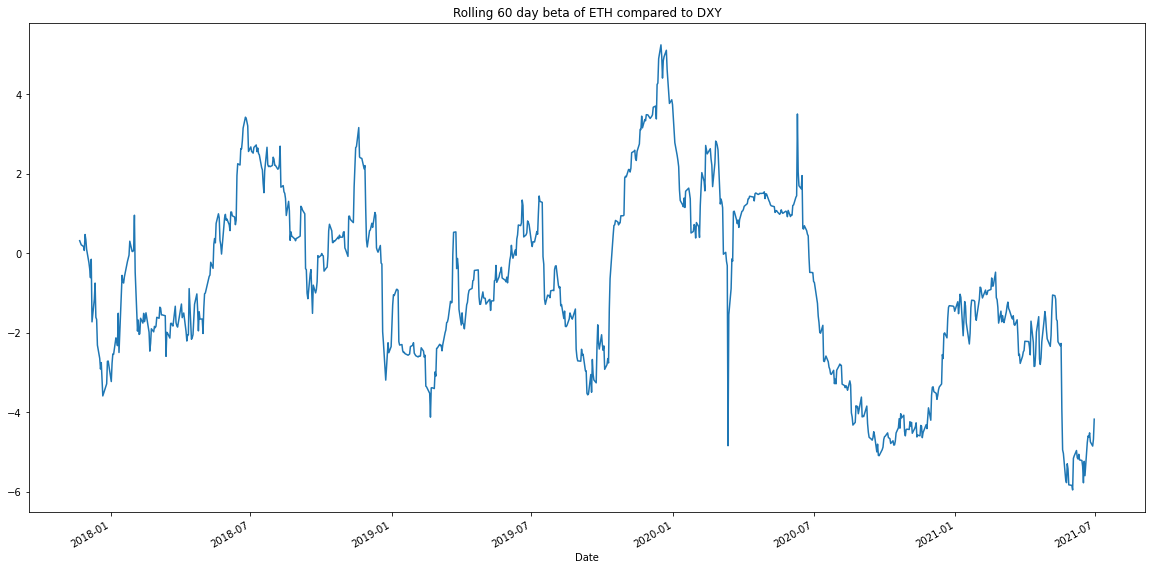

In [131]:
# Calculate Beta for eth compared to dxy
rolling_covariance = df_daily['ETH'].rolling(window=60).cov(df_daily['DXY'])
rolling_variance = df_daily['DXY'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of ETH compared to DXY')

<AxesSubplot:title={'center':'Rolling 60 day beta of Gold comapred to DXY'}, xlabel='Date'>

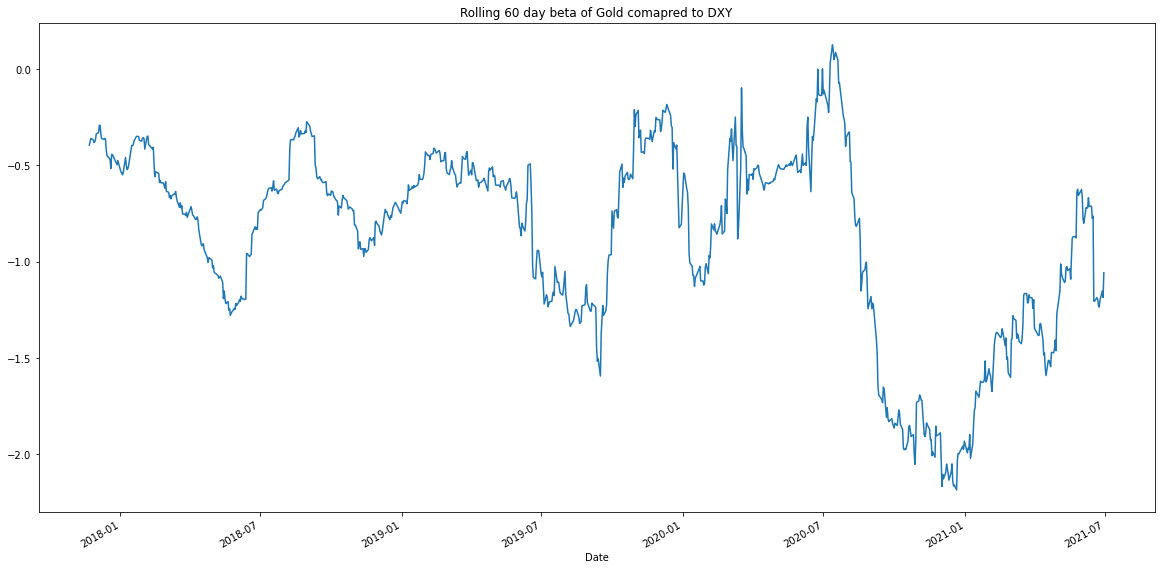

In [132]:
# Calculate Beta for gold compared to dxy
rolling_covariance = df_daily['Gold'].rolling(window=60).cov(df_daily['DXY'])
rolling_variance = df_daily['DXY'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of Gold comapred to DXY')

<AxesSubplot:xlabel='Date'>

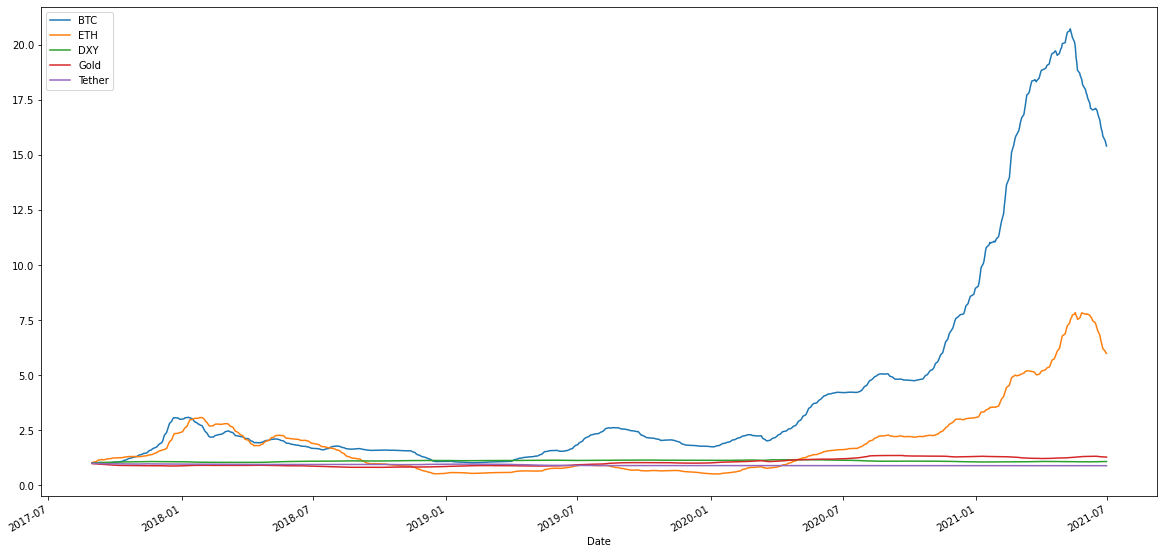

In [133]:
df_daily_ewm = df_daily.ewm(span = 21, adjust=False).mean()
(1 + df_daily_ewm).cumprod().plot(figsize=(20, 10))

In [134]:
# Annualized sharpe ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

BTC       0.975890
ETH       0.475993
DXY       0.147619
Gold      0.560437
Tether   -0.484811
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

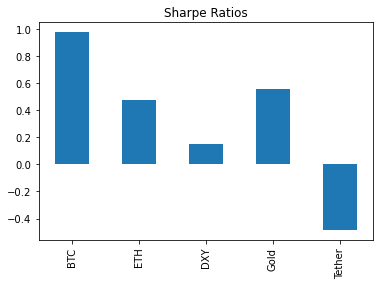

In [135]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")